# PREDICTING LIFE EXPECTANCY RATIO

Design a Regression model to predict life expectancy ratio of a given country based on some features provided such as year, GDP(gross domestic product), education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country.

Steps to be followed:

1.Install watson_machine_learning_client for model building
 **This step can be ignored**.
2.Import necessary libraries
3.Import Dataset
4.Perform Data-Preprocessing
5.Exploratory data analysis
6.Train and Test 
    Choose a supervised machine learning algorithm for the model which best fits the model and can give maximum accuracy over test data.       Here it is ExtraTreesRegressor method.
7.Model Building and Deployment 
      Copy and Paste your machine learning instance credentials into wml_credentials 
      Build a model and store it    
      Then get the scoring_endpoint which can be used further in case of webpage designing 
      Then test the deployment.

# INSTALL WATSON_MACHINE_LEARNING_CLIENT FOR MODEL BUILDING

In [1]:
!pip install watson_machine_learning_client

# IMPORT NECESSARY LIBRARIES

In [2]:
#import basic libraries for preprocessing and EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math
#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#import libraries for train and test
from sklearn.model_selection import train_test_split
#import ExtraTreesRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries for accuracy and error calculation
from sklearn.metrics import mean_squared_error, r2_score
#import libraries for model building and deployment
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-02 07:13:33,441 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


# IMPORT DATASET

In [3]:
# The code was removed by Watson Studio for sharing.

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing          65.00000        263.00000   
1  Afghanistan  2014  Developing          59.90000        271.00000   
2  Afghanistan  2013  Developing          59.90000        268.00000   
3  Afghanistan  2012  Developing          59.50000        272.00000   
4  Afghanistan  2011  Developing          59.20000        275.00000   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62  0.01000                71.27962     65.00000      1154  ...   
1             64  0.01000                73.52358     62.00000       492  ...   
2             66  0.01000                73.21924     64.00000       430  ...   
3             69  0.01000                78.18422     67.00000      2787  ...   
4             71  0.01000                 7.09711     68.00000      3013  ...   

     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  \
0  6.00000            8.16000     65.00000    0.10000 584.25921   
1 58.00000            8.18000     62.00000    0.10000 612.69651   
2 62.00000            8.13000     64.00000    0.10000 631.74498   
3 67.00000            8.52000     67.00000    0.10000 669.95900   
4 68.00000            7.87000     68.00000    0.10000  63.53723   

      Population   thinness  1-19 years   thinness 5-9 years  \
0 33736494.00000               17.20000             17.30000   
1   327582.00000               17.50000             17.50000   
2 31731688.00000               17.70000             17.70000   
3  3696958.00000               17.90000             18.00000   
4  2978599.00000               18.20000             18.20000   

   Income composition of resources  Schooling  
0                          0.47900   10.10000  
1                          0.47600   10.00000  
2                          0.47000    9.90000  
3                          0.46300    9.80000  
4                          0.45400    9.50000  

[5 rows x 22 columns]

# DATA PREPROCESSING

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df=df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
#FILL NULL VALUES TO AVOID TRAIN AND TEST ERROR
df=df.fillna(df.mean())

In [8]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

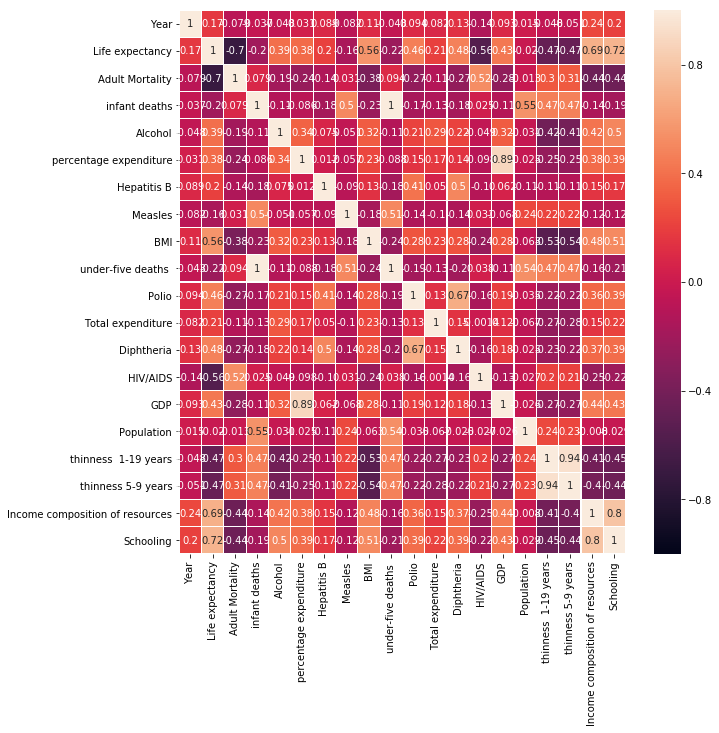

In [9]:
#PLOTTING A HEATMAP 
df_kor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor,vmin=-1,vmax=1,annot=True,linewidth=0.1)

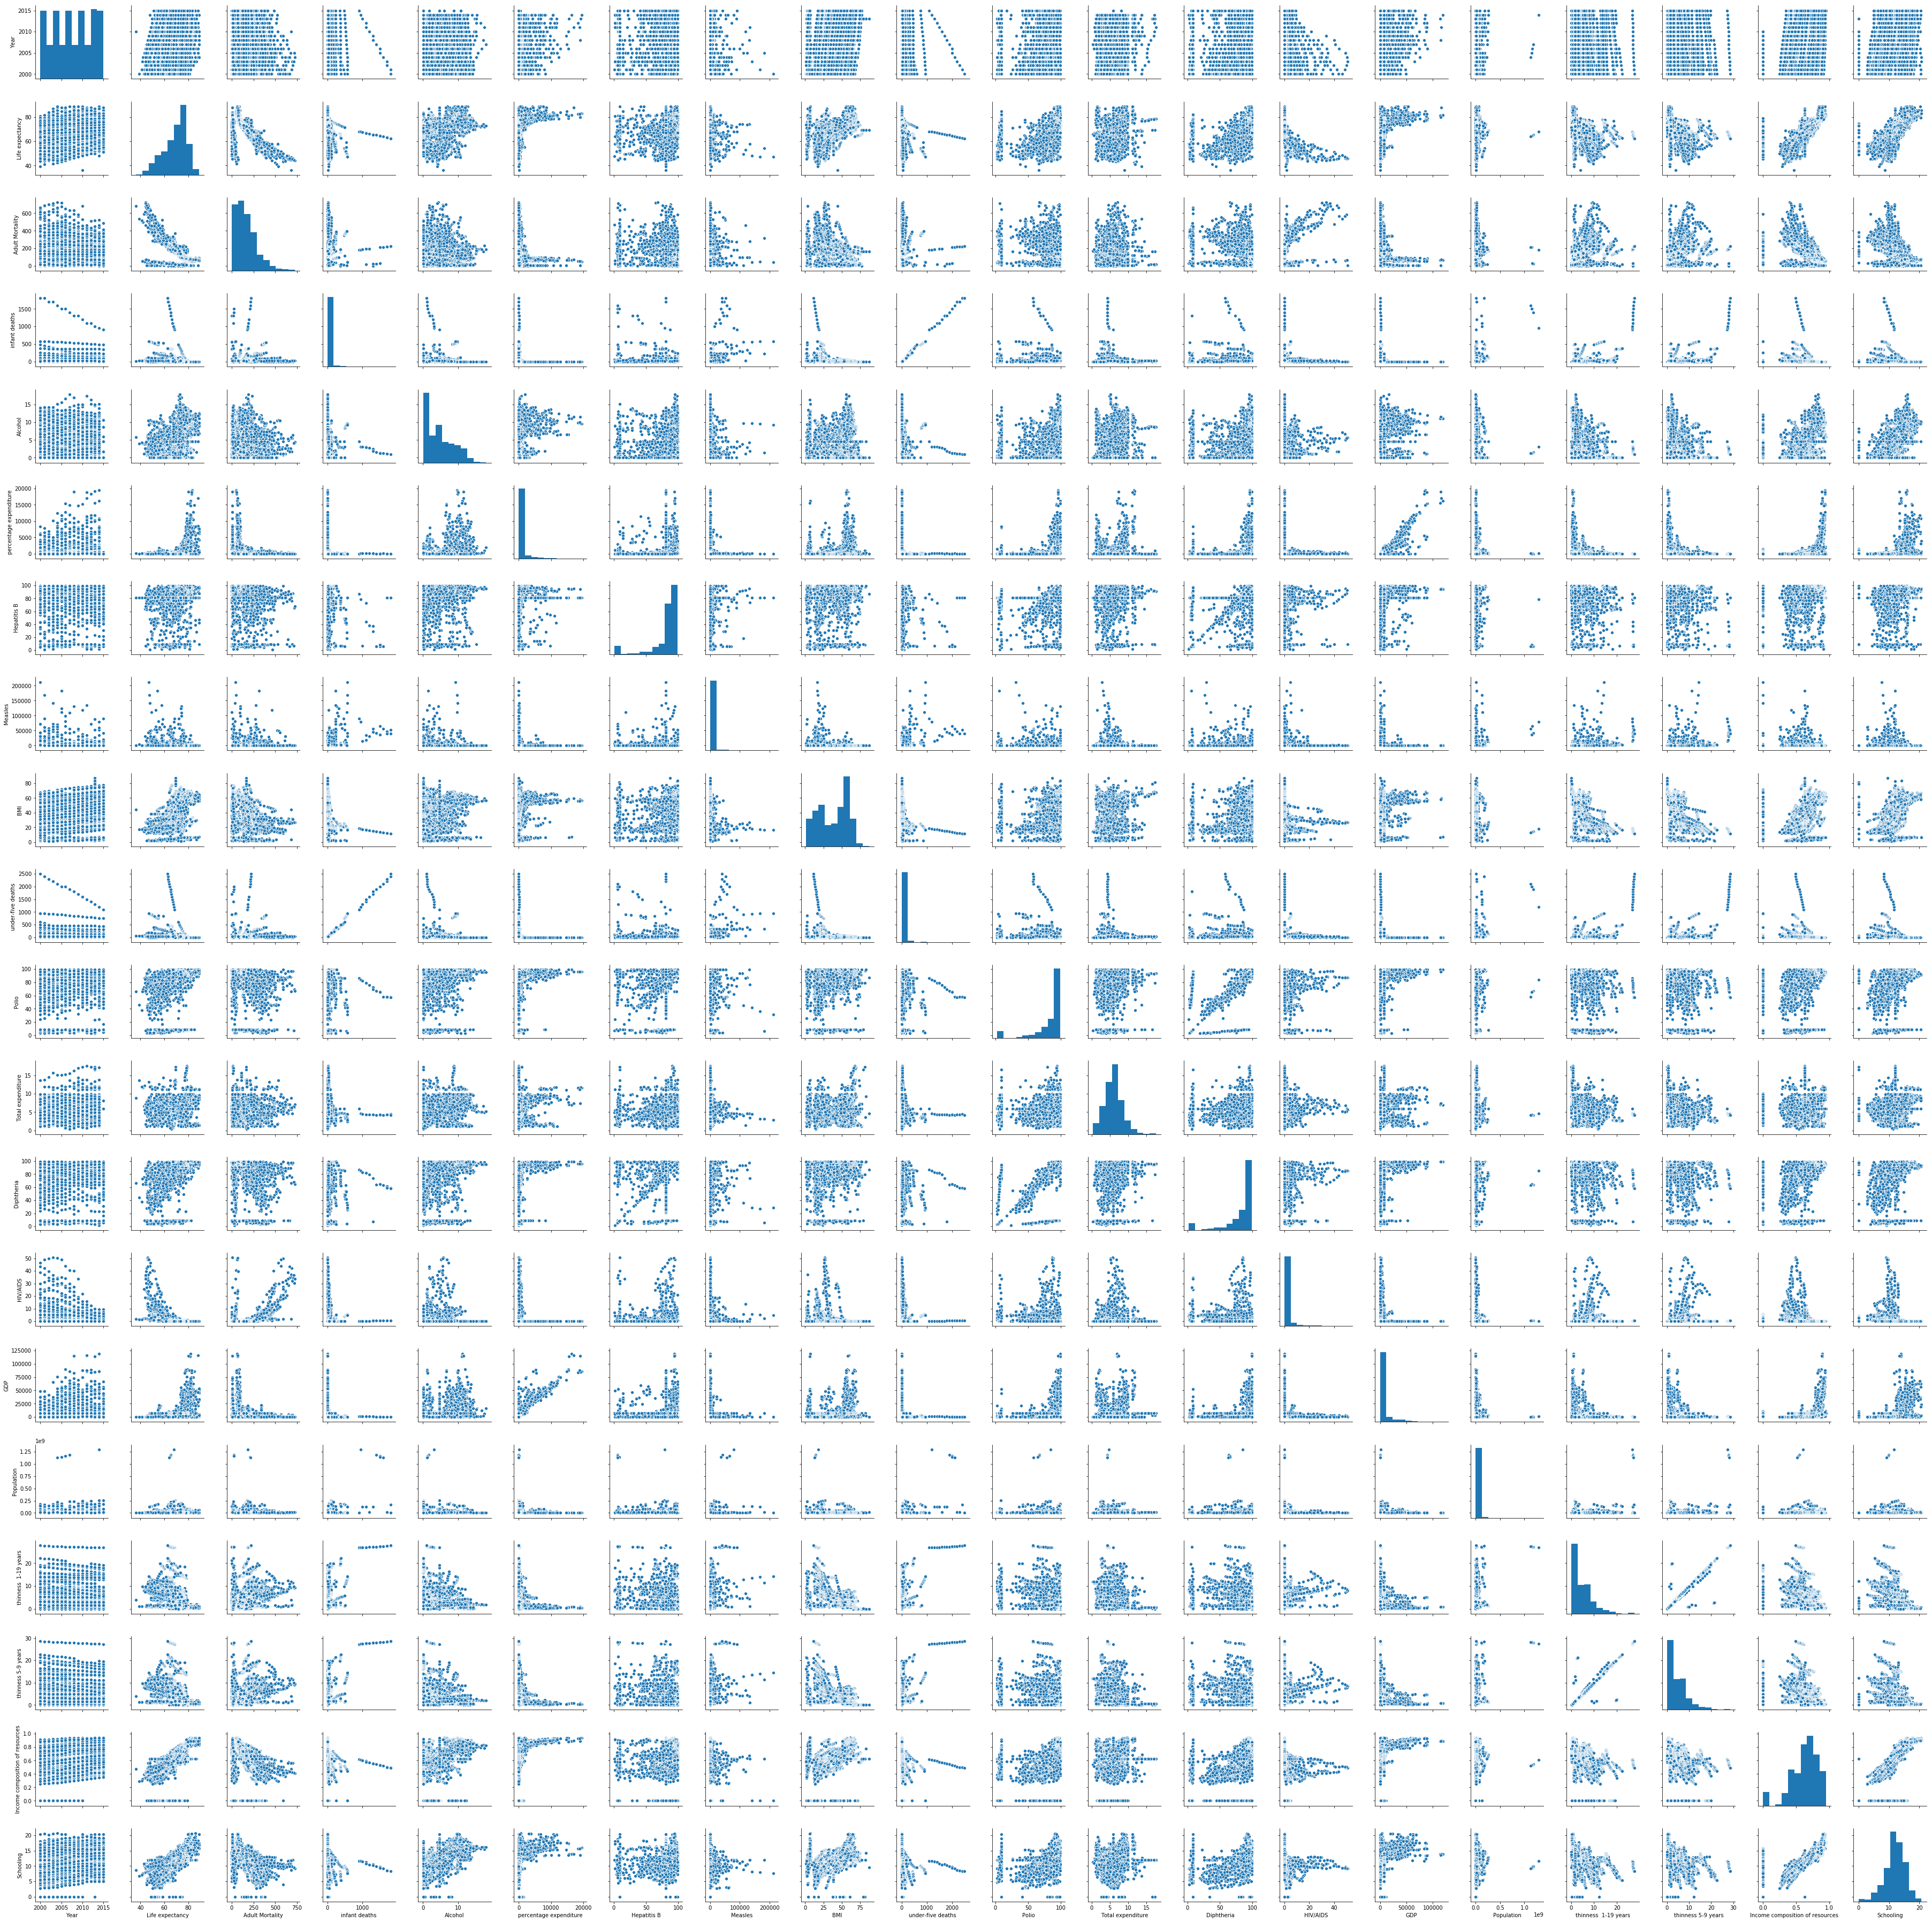

In [10]:
#PLOTTING A PAIRPLOT
sns.pairplot(df)

# TRAINING AND TESTING

In [11]:
#SPLITTING THE DATASET
Y=df['Life expectancy']
X=df[df.columns.difference(['Life expectancy'])]

In [12]:
#SEE NUMERICAL COLUMNS
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
#SEE CATEGORICAL COLUMNS
df.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [14]:
#IDENTIFY THE CATEGORICAL VALUES FOR COLUMNTRANSFORM
categorical_features = ['Country', 'Status']
categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
#DEFINE CATEGORICAL PIPELINE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [15]:
#IDENTIFY THE NUMERIC VALUES FOR COLUMNTRANSFORM
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']
numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
#DEFINE NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [16]:
#PIPELINNING USING COLUMNTRANSFORM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [17]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
ExtraTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('ExtraTreeRegressor', ExtraTreesRegressor(n_estimators=100, random_state=0))
])

In [18]:
#TRAIN-TEST SPLIT
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
#FIT THE TRAINING MODEL
reg = ExtraTreeRegressor.fit(X_train, Y_train)

In [20]:
#PREDICT THE TEST DATA VALUE
test_pred=reg.predict(X_test)
print(test_pred)

[59.36       72.546      60.736      65.902      67.63524932 73.199
 73.946      73.74       78.33       74.749      56.703      70.938
 74.35       71.972      78.722      75.696      54.747      75.104
 74.13       62.88       72.744      75.869      76.279      75.624
 74.598      81.372      72.62524932 71.603      51.389      64.271
 81.408      67.76924932 73.641      74.149      57.675      66.604
 72.113      76.182      63.641      60.399      45.737      69.98499727
 66.636      71.04       76.174      80.101      55.905      72.889
 65.784      69.958      50.224      76.328      72.641      78.402
 47.231      57.605      59.994      63.244      75.761      55.703
 48.673      65.121      74.132      56.573      73.924      78.52
 62.756      74.686      69.752      82.187      75.001      68.938
 73.149      84.736      53.712      72.642      82.369      78.608
 74.44224932 64.235      72.149      71.761      76.122      56.184
 75.591      53.151      63.046      76.947 

In [21]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred))
print('R2 score: ',r2_score(Y_test, test_pred)*100)

Mean squared error:  2.4800762363544
R2 score:  97.0704516563834


# MODEL BUILDING AND DEPLOYMENT

In [22]:
wml_credentials={
 "apikey": "***********",
 "instance_id": "**********",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://eu-gb.ml.cloud.ibm.com


In [23]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "******", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "*********", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}
#STORE THE MACHINE LEARNING MODEL
model_artifact=client.repository.store_model(ExtraTreeRegressor, meta_props=model_props)

In [24]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployment = client.deployments.create(model_uid, name="LifeExpectancyPrediction")



#######################################################################################

Synchronous deployment creation for uid: '0fba6fb8-3da2-4899-9b3c-f2e56f62ec9f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f0288511-e2b5-497e-82e9-01915593948c'
------------------------------------------------------------------------------------------------




In [25]:
#GET SCORING END-POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/6ee18429-4d62-454e-b51e-fc9d4b9cec1e/deployments/f0288511-e2b5-497e-82e9-01915593948c/online


In [26]:
#TEST THE DEPLOYMENT
scoring_payload = {"fields": ['BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Country', 'Diphtheria ', 'GDP',
       'Hepatitis B', 'Income composition of resources', 'Measles ', 'Polio',
       'Population', 'Schooling', 'Status', 'Total expenditure', 'Year',
       'infant deaths', 'percentage expenditure', 'under-five deaths '],"values":[[19.1,0.1,17.2,17.3,263,0.01,'Afghanistan',65,584.25,65,0.47,1154,6,33736494,10,'Developing',8.16,2015,62,71.27,83]]}
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(predictions)

{'fields': ['prediction'], 'values': [[63.70799999999999]]}
